<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Hall/Lab4_Hall_voltage_slope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Hall voltage slope asymmetry measurements

Evgeny Kolonsky 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Observations $U_H(I_p)$ at room temperature with `UH_comp` variations

Does $U_H$ compensation influence the $U_H(I_p)$ slope?

Text(0, 0.5, 'Uh [mV]')

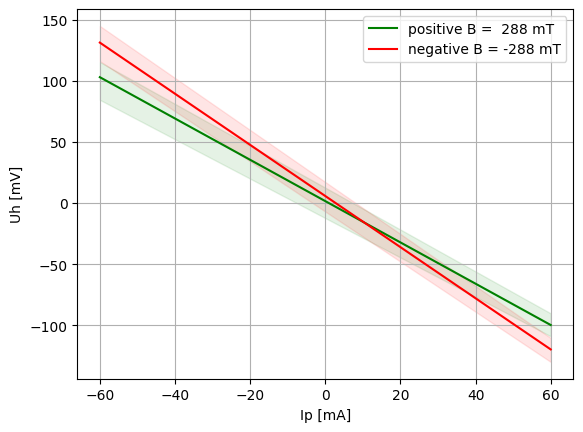

In [2]:
# B = 288  mT
# sample 14
data1 = '''
# Ip/mA, Uh/mV, sign B
# Uh compensation  = 0
-60 100.77 0
-56 94.00 0
-50 84.96 0
-45 76.25 0
-40 69.95 0
-35 60.99 0
-30 51.31 0
-25 43.8 0
-20 35.22 0
-15 27.99 0
-11 20.95 0
-6 11.96 0
-4 9.15 0
-1 3.34 0
0 1.00 0
2 -2.39 0
5 -9.36 0
11 -18.23 0
14 -22.86 0
18 -30.37 0
22 -36.42 0
25 -41.95 0
32 -54.22 0
38 -63.84 0
45 -76.29 0
50 -85.53 0
55 -93.79 0
61 -104.40 0
#Uh compensation leftmost
-59 111 1
-51 99 1
-42 84 1
-36 75 1
-30 64 1
-24 54 1
-20 47 1
-17 43 1
-10 32 1
-6 24 1
-0 14 1
4 6 1
7 0 1
13 -9 1
18 -19 1
26 -32 1
33 -45 1
43 -61 1
53 -79 1
60 -91 1
# Uh comp rightmost
-60 82 2
-52 71 2
-37 48 2
-25 29 2
-16 15 2
-8 2 2
-4 -5 2
2 -16 2
8 -26 2
18 -41 2
28 -58 2
36 -69 2
42 -81 2
60 -110 2
'''
Ip1, Uh1, Uhcomp1 = np.genfromtxt(data1.splitlines()).T

ip = np.linspace(-60, 60)

fit1 = linregress(Ip1, Uh1)

# change B polarity
# B = -287 mT
data2 = '''
# Ip/mA, Uh/mV, sign B
# Uh = 0
-60 -131.53 0
-55 -120.81 0
-47 -104.70 0
-41 -92.11 0
-34 -77.17 0
-30 -67.30 0
-24 -55.90 0
-20 -46.69 0
-15 -37.62 0
-10 -25.23 0
-4 -13.60 0
-0 -5.82 0
0 -2.25 0
2 0.12 0
6 10.23 0
12 21.19 0
19 36.40 0
26 50.59 0
32 62.81 0
37 73.35 0
43 85.72 0
50 99.07 0
60 121.29 0
# Uh compensation leftmost
-59 -115 1
-48 -91 1
-40 -76 1
-30 -55 1
-24 -41 1
-16 -28 1
-10 -15 1
-6 -5.5 1
0 7 1
4 18 1
11 32 1
18 45.73  1
23 56 1
30 67 1
38 84 1
44 98 1
54 115 1
60 129 1
# Uh compensation rightmost
60 109 2
54 95  2
45 77 2
40 66.3  2
35 58 2
30 47 2
24 36 2
20 26 2
16 19 2
10 04 2
7 0 2
3 -7 2
0 -15 2
-4 -28 2
-8 -36 2
-14 -47 2
-20 -59 2
-24 -70 2
-31 -85 2
-40 -103 2
-51 -126 2
-59 -143 2
'''
Ip2, Uh2, Uhcomp2 = np.genfromtxt(data2.splitlines()).T

fit2 = linregress(Ip2, Uh2)
fit1low = linregress(Ip1[Uhcomp1==1], Uh1[Uhcomp1==1])
fit1top = linregress(Ip1[Uhcomp1==2], Uh1[Uhcomp1==2])
fit2low = linregress(Ip2[Uhcomp2==1], Uh2[Uhcomp2==1])
fit2top = linregress(Ip2[Uhcomp2==2], Uh2[Uhcomp2==2])
plt.fill_between(ip, fit1low.slope * ip + fit1low.intercept,
                     fit1top.slope * ip + fit1top.intercept,
                     color='green', alpha=0.1 )
plt.fill_between(ip, -fit2low.slope * ip - fit2low.intercept,
                     -fit2top.slope * ip - fit2top.intercept,
                     color='red', alpha=0.1 )

plt.plot(ip, ip* fit1.slope + fit1.intercept, color='green', label='positive B =  288 mT')
plt.plot(ip, -ip* fit2.slope - fit2.intercept, color='red', label='negative B = -288 mT')

#plt.plot(Ip1, Uh1, '.', color='green', label='positive B =  288 mT')
#plt.plot(Ip2, -Uh2, '.', color='red',  label='negative B = -288 mT')
plt.grid()
plt.legend()
plt.xlabel('Ip [mA]')
plt.ylabel('Uh [mV]')

## Conslusion


No, `UH_COMP` switch only offsets the line and does not correct the slopes. The slopes are not the same for positive and negative $B$ of the same abs value.

# Slope $U_H(I_p)$ at zero magnetic field

beta = -2.97e-03
U0 = 2.5 mV


Text(0, 0.5, 'Uh [mv]')

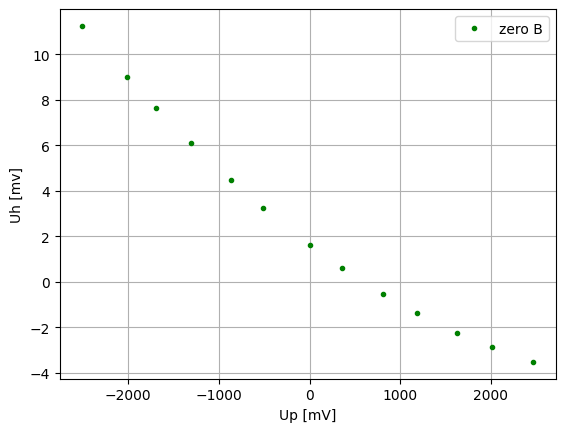

In [16]:
url = 'https://raw.githubusercontent.com/evgeny-kolonsky/Lab4/refs/heads/main/Hall/zero14.txt'
Ip, Up, Uh = np.genfromtxt(url).T

fit = linregress(Up, Uh)
beta = fit.slope
U0 = fit.intercept
print(f'beta = {beta:.2e}')
print(f'U0 = {U0:.1f} mV')
plt.plot(Up, Uh, '.', color='green', label='zero B')
plt.grid()
plt.legend()
plt.xlabel('Up [mV]')
plt.ylabel('Uh [mv]')

# A model with misalignment factor

**Model**

Let's suggest that
$$
U_H'(B,I_p)=U_H(B,I_p)+\beta U_p + U_0,
\tag{1}
$$
where $U_H'$ is observed voltage on Hall pins of the PHYWE Hall unit,
$U_H$ is "pure" hall voltage, $I_p$ is longitudal current through the semiconductor sample, $B$ - magnetic field value, $U_p$ - voltage on longitudal pins, creating current $I_p$, $U_0$ is offset, which can be compensated by `UH_comp` regulator, and $\beta$ is a small unitless misalignment factor, explaining longitudal voltage "leak" to Hall  pins.


We have
$$U_H = H \, I_p = \frac{R_H B}{d} I_p
\tag{2}
$$
and
$$U_p=R_{xx}\,I_p
\tag{3}.$$
Here $R_H$ is Hall  coefficient, $d$ - thickness of the sample, $R_{xx}$ - longitudal resistance.

"Pure" Hall voltage is purely antisymmetric with regard to the $B$ sign:
$$
U_H(+B)|_{I_p} = - U_H(-B)|_{I_p}
$$
while "longitudal voltage leak" component does not depend on $B$ and increases linearly with current $I_p$ having the slope $\beta R_{xx}$.


**Key relations**

Assume that the offset $U_0 = 0$ is forced to zero with `UH_comp` compensation.
Then "pure" hall voltage and misalignment factor can be found by linear combinations of Hall voltage measurement with positive and negative sign magnetic field of the same absolute value $|B|$:
$$
U_{odd}  = \frac{U_H'(I_p)|_{+B} - U_H'(I_p)|_{-B}}{2} = U_H
\tag{4}
$$
and
$$
U_{even} =  \frac{U_H'(I_p)|_{+B} + U_H'(I_p)|_{-B}}{2} = \beta U_p
\tag{5}
$$

Hall coefficient $R_H$ can be found from (2) and (4):
$$
R_H = \left[\frac{U_{odd}}{I_p}\right] \frac{d}{B}
$$

Longitudal resistance $R_{xx}$ can be found from linear fitting $U_p(I_p)$ measurements:
$$
R_{xx} = \left[\frac{U_p}{I_p}\right]
$$
Then value of misalignment factor $\beta$ can be found from fitting $U_{even}$ slope:
$$\beta=\left[\frac{U_{even}}{I_p}\right] / R_{xx}.$$




# 2. Measure Hall volatge $U_H$ and longitudal voltage $U_p$ as a function of $I_p$

In [4]:
B = -285e-3 #mT
d = 1e-3 # mm, sample thickness,
# Uh = 0
data3 = '''
# Ip/mA, Uh/mV, Up/mV
-60 101 2595
-50 86 2186
-41 70 1790
-30 52 1315
-20 35 877
-10 18.53 464
0 4 100
2 -0.57 -010
11 -17 -426
20 -31.65 -774
30 -48 -1178
40 -67 -1638
49 -82.5 -2024
62 -103.73 -2545
'''
Ip3, Uh3, Up3 = np.genfromtxt(data3.splitlines()).T

fit3 = linregress(Ip3, Uh3)
Uh3_ = fit3.intercept + ip * fit3.slope
Rx = np.abs(linregress(Ip3, Up3).slope)
print(Rx)
# change B polarity
#B = 277
data4 = '''
# Ip/mA, Uh/mV, Uxx/mV
-60 -120 2590
-49 -100 2169
-40 -81 1767
-29 -60 1302
-19 -42 881
-10 -24 506
0 -4 71
10 -18 -382
20 36 -764
30 57 -1220
40 76 -1626
50 97 -2075
61 114 -2537
'''
Ip4, Uh4, Up4 = np.genfromtxt(data4.splitlines()).T

fit4 = linregress(Ip4, Uh4)
Uh4_ = fit4.intercept + ip * fit4.slope
Rx = np.abs(linregress(Ip4, Up4).slope)



42.17744139679836


In [6]:
Uh_odd = (Uh3_ - Uh4_) / 2
Uh_even = (Uh3_ + Uh4_) / 2
beta = linregress(ip, Uh_even).slope / Rx

R_H = linregress(ip, Uh_odd).slope * d / B
R_H3 = linregress(ip, Uh3_).slope * d / B
R_H4 = linregress(ip, Uh4_).slope * d / B

print(f'Longitudal resistance Rx= {Rx:.1f} Ohm')
print(f'Misalignment factor beta= {beta:.2e}')
print(f'Hall coefficient with misalignment factor R_H = {R_H:.2e} m3/C')
print(f'Hall coefficient R_H with positive field      = {R_H3:.2e} m3/C')
print(f'Hall coefficient R_H with negative field      = {-R_H4:.2e} m3/C')

Longitudal resistance Rx= 42.6 Ohm
Misalignment factor beta= 3.04e-03
Hall coefficient with misalignment factor R_H = 6.37e-03 m3/C
Hall coefficient R_H with positive field      = 5.91e-03 m3/C
Hall coefficient R_H with negative field      = 6.82e-03 m3/C
